Support vector Regression Model Prediction

In [1]:
#importing all the libariries that needed to run the prediction model
import pandas as pd
import numpy as np
#sklearn libary importing support vector regression
from sklearn.svm import SVR
#importing linear regression
from sklearn.linear_model import LinearRegression
#importing matplotlib to plot the graph
import matplotlib.pyplot as plt
#importing KneighborClassfier from sklearn
from sklearn.neighbors import KNeighborsClassifier
#Importing metrics for the accuracy
from sklearn.metrics import accuracy_score
from pandas_datareader import data as pdr

In [2]:
cd desktop/AirlinesData

/Users/akashghosh/Desktop/AirlinesData


In [3]:
#predicting the company American airlines by reading the csv. we taking a month of data to predict.
AA = pd.read_csv('AAL.csv')
AA.head(22)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-17,15.790000,18.49,14.79,15.58,15.58,58055800
1,2020-03-18,14.240000,14.28,10.17,11.65,11.65,78458800
2,2020-03-19,11.600000,12.16,10.01,10.29,10.29,71584500
3,2020-03-20,10.650000,12.00,10.30,10.38,10.38,62681800
4,2020-03-23,10.900000,11.36,10.01,10.25,10.25,56427300
5,2020-03-24,11.960000,14.81,11.54,13.92,13.92,101553100
6,2020-03-25,16.690001,16.99,14.31,15.39,15.39,93795100
7,2020-03-26,16.059999,17.24,15.16,15.66,15.66,77530600
8,2020-03-27,14.980000,15.22,13.91,14.04,14.04,50783500
9,2020-03-30,13.200000,13.22,11.81,12.25,12.25,50516800


In [4]:
#we need to create the dataset of x and y which is the two data set we going to take to predict the model
#so we have to take the date and we taking the "Close" cloumn
dates = []
prices = []
AA.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
21,2020-04-16,11.91,12.03,11.05,11.07,11.07,80873400


In [5]:
# retriving the data until the last row
AA = AA.head(len(AA)-1)
AA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-17,15.790000,18.49,14.79,15.58,15.58,58055800
1,2020-03-18,14.240000,14.28,10.17,11.65,11.65,78458800
2,2020-03-19,11.600000,12.16,10.01,10.29,10.29,71584500
3,2020-03-20,10.650000,12.00,10.30,10.38,10.38,62681800
4,2020-03-23,10.900000,11.36,10.01,10.25,10.25,56427300
5,2020-03-24,11.960000,14.81,11.54,13.92,13.92,101553100
6,2020-03-25,16.690001,16.99,14.31,15.39,15.39,93795100
7,2020-03-26,16.059999,17.24,15.16,15.66,15.66,77530600
8,2020-03-27,14.980000,15.22,13.91,14.04,14.04,50783500
9,2020-03-30,13.200000,13.22,11.81,12.25,12.25,50516800


In [6]:
AA_dates = AA.loc[:, 'Date']
#Getting  all of the rows from the Close Column
AA_open = AA.loc[:, 'Close']

In [7]:
#building  the independent data set for x
for date in AA_dates:
 dates.append( [int(date.split('-')[2])])
  
#building the dependent data set for y
for Close_price in AA_open:
  prices.append(float(Close_price))
#printing all the dates 
print(dates)

[[17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [31], [1], [2], [3], [6], [7], [8], [9], [13], [14], [15]]


In [8]:
#prediction model to build the relationship between x and y to do a prediction
def predict_prices(dates, prices, x):
  
  #Creating the  Support Vector Regression model
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')
  
  #TRAINING THE DATA SET TO GET THE MODEL OF PREDICTION 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #creating rhe model of LR
  lin_reg = LinearRegression()
  #Trainning the model
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('SVR MODEL')
  plt.legend()
  plt.show()
  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


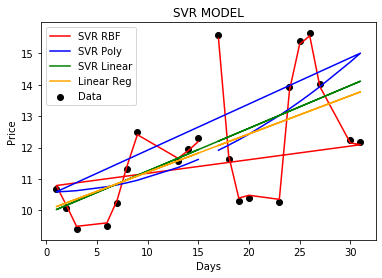

(13.469151605520581, 12.06909090903787, 11.763420316677479, 11.9455313174946)


In [9]:
#Predict the price of American Airlines on day 
predicted_price = predict_prices(dates, prices, [[16]])
print(predicted_price)

#Using KNN algorithm

In [10]:
#getting the data set for American Airlines
AA


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-17,15.790000,18.49,14.79,15.58,15.58,58055800
1,2020-03-18,14.240000,14.28,10.17,11.65,11.65,78458800
2,2020-03-19,11.600000,12.16,10.01,10.29,10.29,71584500
3,2020-03-20,10.650000,12.00,10.30,10.38,10.38,62681800
4,2020-03-23,10.900000,11.36,10.01,10.25,10.25,56427300
5,2020-03-24,11.960000,14.81,11.54,13.92,13.92,101553100
6,2020-03-25,16.690001,16.99,14.31,15.39,15.39,93795100
7,2020-03-26,16.059999,17.24,15.16,15.66,15.66,77530600
8,2020-03-27,14.980000,15.22,13.91,14.04,14.04,50783500
9,2020-03-30,13.200000,13.22,11.81,12.25,12.25,50516800


In [36]:
#Getting open-close and high-low to get the value
AA['Open-Close'] = AA.Open -AA.Close
AA['High-Low'] = AA.High -AA.Low
AA = AA.dropna()
X= AA[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,0.21,3.70
1,2.59,4.11
2,1.31,2.15
3,0.27,1.70
4,0.65,1.35


In [37]:
Y= np.where(AA['Close'].shift(-1)>AA['Close'],1,-1)

In [38]:
#splitting the data and trainning the data with x and Y variables
#splitting the 80% of the data
split_percentage = 0.8
split = int(split_percentage*len(AA))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[:split]
Y_test = Y[:split]


In [39]:
#k = 12, then the object is simply assigned to the class of that nearest neighbor.
knn = KNeighborsClassifier(n_neighbors=12)
#Fitting the data for x and y VARIABLE
knn.fit(X_train, Y_train)
#trainnig the accuracy train and and test data
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))


In [40]:
#printing out the tran and test results for the model
print(accuracy_train)
print(accuracy_test)

0.625
0.625
